In [1]:
from scipy.stats import poisson
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import math as m

([<matplotlib.axis.YTick at 0x7f9a68eb4dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

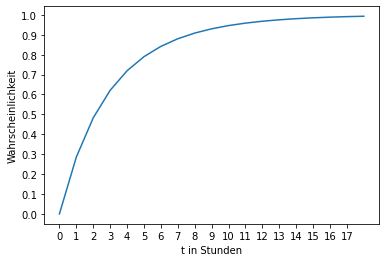

In [2]:
## Verteilungsfunktion (vor Ableitung)
verteilung_neu=[]
for y in range(0,19):
        F = 1-(((37/99)*m.exp(-0.5*y)) + ((62/99)*m.exp(-0.25*y)))
       # print(F)
        verteilung_neu.append(F)
x = np.arange(0,19)


plt.plot(x,verteilung_neu)
plt.xlabel("t in Stunden")
plt.ylabel("Wahrscheinlichkeit")
plt.xticks(np.arange(0,18,1))
plt.yticks(np.arange(0,1.1,0.1))

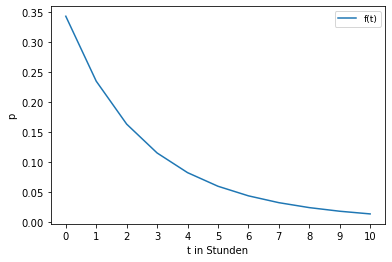

In [3]:
##Dichtefunktion
dichte_stunden = []

# Dichtefunktion wird bis y=10 kalkuliert und in dichte-Liste gespeichert
# Dichtefunktion in Stunden
for y1 in range(0,11):
    # Ableitung der gegebenen Tail-Funktion
    cdf_stunden = ((37/198)*m.exp(-0.5*y1)) + ((31/198)*m.exp(-0.25*y1))
    
    #in minuten F(y/60) und dann abgeleitet 
    cdf_min = ((37/11880)*m.exp(-0.25*(y1/120))) + ((31/11880)*m.exp(-0.5*(y1/240)))
    
    #dichte_stunden.append(cdf_stunden)           
    dichte_stunden.append(cdf_stunden)           



# Visualisierung ab hier
x = np.arange(0,11)

plt.plot(x,dichte_stunden,label="f(t)")
plt.xlabel("t in Stunden")
plt.ylabel("p")
plt.xticks(np.arange(0,11))

#plt.axvline(result[0],color="orange",ymax=0.4, label="Erwartungswert")


#Legende
plt.legend(loc="upper right",prop={'size': 9})

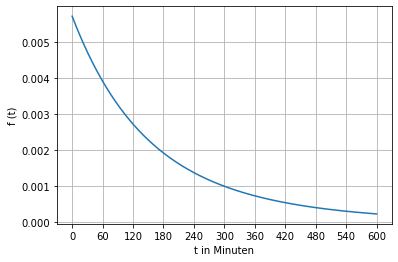

In [4]:
# 10 Stunden = 600 Minuten, deshalb range bis 360
# Dichte in Minuten
dichte_minuten=[]
for y1 in range(0,601):
    #cdf_stunden = ((37/198)*m.exp(-0.5*y1)) + ((31/198)*m.exp(-0.25*y1))
    cdf = ((37/11880)*m.exp(-(1/120)*y1) + ((31/11880)*m.exp(-(1/240)*y1)))
    dichte_minuten.append(cdf)           
    #print(f)

# Visualisierung ab hier
x = np.arange(0,601)

plt.plot(x,dichte_minuten,label="f(y)")
plt.xlabel("t in Minuten")
plt.ylabel("f (t)")
plt.xticks(np.arange(0,601,60))
plt.grid(True)

In [8]:
##Mittelwert kalkulieren
# Integral
import scipy.integrate as integrate

def calculateDensity(y):
    """
    Funktion die zur Berechnung des Integrals per intgrate.quad benötigt wird
    Integral f(y)*y
    """
    f = ((37/198)*m.exp(-(0.5*y)) + ((31/198)*m.exp((-0.25*y))))*y
    return f

#Berechnung in Minuten
def calculateDensity1(y):
    """
    Funktion die zur Berechnung des Integrals per intgrate.quad benötigt wird
    Integral f(y)*y
    """
    f = ((37/11880)*m.exp(-(1/120)*y) + ((31/11880)*m.exp(-(1/240)*y))) * y
    return f

# Berechnung Varianz 
def calculateVariance(y):
    """
    Funktion die zur Berechnung des Integrals per intgrate.quad benötigt wird
    Integral(x-E(x)^2*f(t))
    """
    f = ((y-mean_minuten[0])**2)*((37/11880)*m.exp(-(1/120)*y) + ((31/11880)*m.exp(-(1/240)*y)))
    return f

mean_stunden = integrate.quad(calculateDensity, 0, np.inf)
mean_minuten = integrate.quad(calculateDensity1, 0, np.inf)
variance = integrate.quad(calculateVariance, 0, np.inf)
stabw = m.sqrt(variance[0])
print("Die Summe des Integrals (= Mittelwert) beträgt",round(mean_stunden[0],2), "stunden", "Bzw.",round(mean_minuten[0],2), "minuten")
print("Die Varianz beträgt:",variance[0], "Die Standardabweichung beträgt:",round(stabw,2))
    

Die Summe des Integrals (= Mittelwert) beträgt 3.25 stunden Bzw. 195.15 minuten
Die Varianz beträgt: 44824.977043158775 Die Standardabweichung beträgt: 211.72


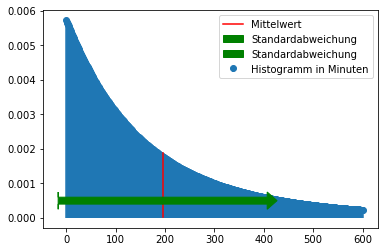

In [6]:
#Histogramm Minutengenau
plt.stem(x,dichte_minuten, basefmt=" ", label="Histogramm in Minuten")

#Mittelwert visualisieren
plt.axvline(mean_minuten[0],color="red",ymax=calculateDensity1(mean_minuten[0]), ymin=0.05, label="Mittelwert")

#Standardabweichung
plt.arrow(x=mean_minuten[0],y=0.0005,dx=stabw,dy=0,width=0.0002, head_width=0.0005, head_length=20, color="green",label="Standardabweichung",zorder=3)
plt.arrow(x=mean_minuten[0],y=0.0005,dx=-stabw,dy=0,width=0.0002, head_width=0.0005, color="green",label="Standardabweichung",zorder=3)

plt.legend()


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a4897afa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a4898d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a4897ac40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a4898dd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a69012100>],
 'means': []}

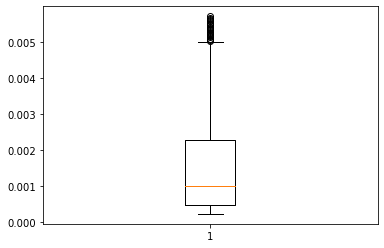

In [7]:
plt.boxplot(dichte_minuten)